# __INFO 2950 FINAL PROJECT PHASE II__
Zhalae Daneshvari, Peyton Smith, Sunny Liu

## Research Questions:

**Questions**: 
1. How does the socioeconomic status of census tracts in New York State, as measured by median income levels, correlate with access to grocery stores, and to what extent does this relationship vary across different income brackets?

2. What is the relationship between the racial composition of census tracts in New York State and the accessibility of grocery stores, and are there significant disparities in store access among different racial groups?

**Purpose**:
This research aims to explore how socioeconomic status and racial composition correlate with access to grocery stores in New York State. Specifically, the study will investigate the relationship between median income levels and the distance to the nearest grocery store across census tracts. It will also analyze how the racial composition of census tracts is associated with grocery store accessibility, identifying any disparities among racial groups. 

**General Process**:
Grocery store locations will be matched with US census tract data to estimate access to grocery stores across socioeconomic and demographic groups. Our plan is to merge the two datasets together in order to analyze it. Census tract centers will serve as proxies for residential locations, and we will extract socioeconomic data including median income and racial composition. The distance between each census tract center and its nearest grocery store will be calculated using latitude and longitude coordinates. Statistical analyses and visualizations will be employed to explore the relationships between income levels, racial composition, and distance to the nearest grocery store. These analyses will include correlation studies, comparative visualizations across income brackets and racial groups.

**Potential Applications**:
The final output will provide insights into food accessibility and potential inequality across different socioeconomic and racial groups in New York State. These findings will help identify areas where communities might face barriers to healthy food access based on income level and racial composition. The research could inform targeted interventions to improve food equity, such as incentives for grocery store development in underserved areas or support for transportation initiatives. Policymakers, urban planners, and non-profit organizations working on food equity issues in New York State can use these insights to develop data-driven strategies for improving food access across diverse communities. Additionally, the methodology and findings could serve as a model for similar studies in other regions, contributing to broader understanding of the socioeconomic and racial dimensions of food accessibility.

**USDA:**
https://www.ers.usda.gov/amber-waves/2016/may/recent-evidence-on-the-effects-of-food-store-access-on-food-choice-and-diet-quality/#:~:text=People%20with%20poor%20access%20to,such%20as%20obesity%20or%20diabetes.

People with poor access to food stores have to travel farther to shop for groceries or rely on stores with fewer choices or higher food prices. Poor access to foods such as fruits/vegetables, whole grains, lean meats, and low-fat dairy products could lead to poor diets and health conditions such as obesity or diabetes.



## Data Description
### What are the observations (rows) and the attributes (columns)?
- **Observations:** Each row represents a unique combination of a census tract in New York State and a nearby retail food store.
- **Attributes:** 
  - NAME: Census tract identifier
  - median_income: Median household income of the census tract
  - white_pop, black_pop, asian_pop, hispanic_pop: Population counts for each racial/ethnic group
  - tract: Census tract number
  - total_pop: Total population of the census tract
  - white_percent, black_percent, asian_percent, hispanic_percent: Percentage of each racial/ethnic group in the tract
  - nearest_store: Identifier for the nearest retail food store
  - nearest_store_name: Name of the nearest retail food store
  - distance_to_nearest_store: Distance in meters from the census tract centroid to the nearest store

### Why was this dataset created?
This dataset was created to facilitate the analysis of the relationship between socioeconomic factors, racial composition, and access to grocery stores in New York State. It combines census data with retail food store locations to enable the exploration of potential disparities in food accessibility across different demographic groups. The retail food stores dataset was created to provide insights into grocery stores licensed by New York State. Its purposes include promoting transparency, facilitating economic analysis, informing policy-making, and aiding in business planning. The U.S. Census data was created to collect detailed demographics and additional information on the composition of small areas (tracts) within the U.S. It serves various purposes including resource allocation, policy-making, and academic research.

### Who funded the creation of the dataset?
The dataset is a combination of data from the U.S. Census Bureau (government-funded) and the New York State Department of Agriculture and Markets. As a result, it's logical that the creation and collection of this data was funded by the government for the purpose of research and policy. The merging and preprocessing of these datasets was done for the purpose of research for our INFO 2950 Group Project.

### What processes might have influenced what data was observed and recorded and what was not?
1. Census data collection methods and potential underreporting in certain communities
2. Licensing and registration processes for retail food stores, which may not capture all food sources
3. Definition of what constitutes a retail food store, potentially excluding some food sources
4. Geospatial calculation methods used to determine nearest stores and distances
5. The use of census tract centroids as proxies for residential locations, which may not accurately represent all residents' locations within a tract

### What preprocessing was done, and how did the data come to be in the form that you are using?
1. Merging of census tract data with retail food store location data
2. Calculation of racial/ethnic percentages from population counts
3. Geospatial analysis to determine the nearest store and its distance for each census tract
5. Data cleaning to handle missing values or outliers

### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
People involved in the census data collection were aware and expected it to be used for various governmental and public purposes. Store owners providing information for licensing were aware of data collection for regulatory purposes. However, individuals were likely unaware of the specific use of this data for analyzing food accessibility disparities based on race and income.

### Where can your raw source data be found?
The raw census data can be accessed through the U.S. Census Bureau's API. https://www.census.gov/data/developers/guidance/api-user-guide.html

The raw retail food store data can be found on the New York State Open Data portal: https://data.ny.gov/Economic-Development/Retail-Food-Stores/9a8c-vfzj/about_data

The merged and preprocessed dataset (merged_census_store_data.csv) used for this analysis is stored within the git repository.


### Importing
First run 'pip install numpy seaborn pandas matplotlib requests geopandas shapely duckdb' in terminal

In [2]:
! pip install geopandas
! pip install duckdb


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#importing packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
from shapely.geometry import shape
import os
import duckdb as db
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point


## Data Cleaning



### Data Cleaning: Retail Food Stores in New York State
Source List of Grocery Stores Provided by New York State:

https://data.ny.gov/Economic-Development/Retail-Food-Stores/9a8c-vfzj/about_data

This contains a csv file of every grocery store location in New York state that could be then paired with census tract data to look at how average distance to grocery stores changes by different socioeconomic groups. We will use census tract centers as an approximation for where everyone in the tract lives and then use the census data to get information on population statistics.

#### Step 1: Loading in the Data

Our primary grocery store dataset comes from the New York State Open Data portal, specifically the "Retail Food Stores" dataset. This dataset provides information about licensed retail food stores across New York State. This step loads our raw data into a pandas DataFrame. Understanding the initial shape is to check later on that our cleaning is actaully changing the dataframe.

In [4]:
# Loading in the dataset
stores = pd.read_csv('https://data.ny.gov/api/views/9a8c-vfzj/rows.csv?accessType=DOWNLOAD')

# Displays the shape of the original raw data for the retail stores
print("Initial dataset shape:", stores.shape)

Initial dataset shape: (24221, 15)


#### Step 2: Selecting Relevant Columns
For our analysis of grocery store access we really only need the store name and location as this will be used to find the distance of how far the store is from the center of the census tract. We will extract these from the 'Entity Name' and 'Georeference' columns.

In [5]:
# Selecting relevant columns
stores = stores[['Entity Name', 'Georeference']]

# Renaming the columns for clarity
stores = stores.rename(columns={'Entity Name': 'name', "Georeference": "georeference"})

print(stores.head())

                   name                        georeference
0         ANK PETRO INC   POINT (-73.816249346 42.46925125)
1           EVANS JULIA  POINT (-73.949128787 42.577416307)
2            HUBRIX LLC  POINT (-77.795356304 42.158830586)
3       REID STORES INC  POINT (-78.277036649 42.220633641)
4  361 DELI GROCERY LLC  POINT (-73.877219853 40.871759695)


#### Step 3: Handling Missing Data
To ensure the accuracy of our spatial analysis in the next steps, we need to clean the data table to remove any stores with missing location data by dropping the NaN values. 

In [6]:
# Remove rows with missing Georeference
stores = stores.dropna(subset=['georeference'])

print("Dataset shape after removing missing georeference values:" + str(stores.shape))

Dataset shape after removing missing georeference values:(24221, 2)


#### Step 4: Extracting Latitude and Longitude from Georeference
To make the location data a more usuable format that we can calculate distance with with the census tract data, we have to extract the latitude and longitude from the Georeference column into their own separate columns, and then drop that column.

In [7]:
# Extract latitude and longitude from Georeference
def extract_coordinates(georeference):
    coords = georeference.strip('POINT ()').split() #this works because same amount of numbers for both latitude and longitude
    return pd.Series({'longitude': float(coords[0]), 'latitude': float(coords[1])}) #convert to float for ease of calculations

stores[['longitude', 'latitude']] = stores['georeference'].apply(extract_coordinates)

# Dropping the OG Georeference column 
stores = stores.drop('georeference', axis=1)

print(stores.head())

                   name  longitude   latitude
0         ANK PETRO INC -73.816249  42.469251
1           EVANS JULIA -73.949129  42.577416
2            HUBRIX LLC -77.795356  42.158831
3       REID STORES INC -78.277037  42.220634
4  361 DELI GROCERY LLC -73.877220  40.871760


#### Step 5: Cleaned Retail Grocery Store Data Check
Our final dataset contains the name, latitude, and longitude of each retail food store in New York State. This data set will be used to calculate distances between stores and census tract centroids.

When combined with census data, this will enable us to investigate how store locations correlate with various socioeconomic factors, addressing our research questions about food access across different demographic groups in New York State.

The next steps are to merge this cleaned store data with census tract data to begin our analysis of the relationship between store locations and socioeconomic factors.

In [8]:
# Info about the cleaned grocery stores dataset
print("Cleaned dataset shape:", stores.shape)
print("Cleaned column names: " + str(stores.columns.tolist()))

# First few rows of cleaned grocery dataset
print("First few rows of the cleaned dataset:")
print(stores.head().to_string())

# Saving the cleaned dataset to a csv file to use later 
stores.to_csv('cleaned_retail_stores.csv', index=False)

Cleaned dataset shape: (24221, 3)
Cleaned column names: ['name', 'longitude', 'latitude']
First few rows of the cleaned dataset:
                   name  longitude   latitude
0         ANK PETRO INC -73.816249  42.469251
1           EVANS JULIA -73.949129  42.577416
2            HUBRIX LLC -77.795356  42.158831
3       REID STORES INC -78.277037  42.220634
4  361 DELI GROCERY LLC -73.877220  40.871760


### Data Cleaning: Census Data for New York State

#### Step 1: Loading in Census Data through Census API

We'll use the Census API to collect demographic data for New York State census tracts, focusing on median household income and racial composition data. This step retrieves census data for all tracts in New York State, including median household income and population counts by race.

In [9]:
# Census API endpoint and parameters
api_key = "273983b851bd05f546e743ac334b18277e8c67d1"  
base_url = "https://api.census.gov/data/2021/acs/acs5"
variables = ["NAME", "B19013_001E", "B02001_002E", "B02001_003E", "B02001_005E", "B03003_003E"] #codes for median income as well as different racial category populations: white, black, hispanic, asian
state = "36" #code for NY State

# API URL
url = f"{base_url}?get={','.join(variables)}&for=tract:*&in=state:{state}&key={api_key}"

# Making the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Creating the DataFrame
    census_df = pd.DataFrame(data[1:], columns=data[0])
    print("Successfully created new dataframe.")
else:
    print(f"Error: Unable to get data. Status code: {response.status_code}")
    print(response.text)
    exit()

Successfully created new dataframe.


#### Step 2: Renaming and Selecting Columns
Renaming the columns to names that make sense to the average person and select only the ones we need for our analysis. This step focuses our dataset on the demographic information relevant to our research question about food access across different socioeconomic groups which in this case is the median income, white population, black population, asian population, and hispanic population. 

In [10]:
# Renaming the columns
column_names = {
    "NAME": "name",
    "B19013_001E": "median_income",
    "B02001_002E": "white_pop",
    "B02001_003E": "black_pop",
    "B02001_005E": "asian_pop",
    "B03003_003E": "hispanic_pop"
}

census_df = census_df.rename(columns=column_names)

# Selecting the relevant columns
census_df = census_df[["name", "median_income", "white_pop", "black_pop", "asian_pop", "hispanic_pop", "tract"]]

print(census_df.head())

                                         name median_income white_pop  \
0     Census Tract 1, Albany County, New York         44871       530   
1  Census Tract 2.01, Albany County, New York         42456       521   
2  Census Tract 2.02, Albany County, New York         24792       124   
3  Census Tract 3.01, Albany County, New York         40666      1155   
4  Census Tract 3.02, Albany County, New York         42370      2180   

  black_pop asian_pop hispanic_pop   tract  
0      1086        87          311  000100  
1      1945       109          165  000201  
2      2316         0           71  000202  
3      1251       221          836  000301  
4       457       387          155  000302  


#### Step 3: Data Type Conversion
We need to convert the numeric columns to the appropriate data type for analysis which in this case is a float as we will be calculating the percentage of the racial populations in a future step.

In [11]:
# Converting the numeric columns to float values
numeric_columns = ["median_income", "white_pop", "black_pop", "asian_pop", "hispanic_pop"]
census_df[numeric_columns] = census_df[numeric_columns].astype(float)

#Sanity check
print("Data types after conversion:")
print(census_df.dtypes)

Data types after conversion:
name              object
median_income    float64
white_pop        float64
black_pop        float64
asian_pop        float64
hispanic_pop     float64
tract             object
dtype: object


#### Step 3: Handling Missing Values
Checking for and handle any missing values in our dataset as that would lead to problems when plotting the data later on and do not want to use data that misses crucial info for our analysis

In [12]:
# Replace -666666666 (Census placeholder for missing data) with NaN
census_df = census_df.replace(-666666666, np.nan)

# Drop the rows with the missing median income
census_df = census_df.dropna(subset=["median_income"])

# Check for missing values
print("Missing values:")
print(census_df.isnull().sum())

# Dataset shape after handling missing values 
print(census_df.shape)

Missing values:
name             0
median_income    0
white_pop        0
black_pop        0
asian_pop        0
hispanic_pop     0
tract            0
dtype: int64
(5198, 7)


#### Step 4: Creating Percentage variables per racial group
Creating percentage variables for racial composition in the census tracts to help with our analysis of whether closest grocert store distance changes based on race in NY state census tracts.

In [13]:
# Calculate total population
census_df["total_pop"] = census_df[["white_pop", "black_pop", "asian_pop", "hispanic_pop"]].sum(axis=1)

# Calculate percentage for each race/ethnicity
for group in ["white", "black", "asian", "hispanic"]:
    census_df[f"{group}_percent"] = census_df[f"{group}_pop"] / census_df["total_pop"] * 100

print(census_df.head())

# Saving the cleaned census data
census_df.to_csv('cleaned_census_data.csv', index=False)

                                         name  median_income  white_pop  \
0     Census Tract 1, Albany County, New York        44871.0      530.0   
1  Census Tract 2.01, Albany County, New York        42456.0      521.0   
2  Census Tract 2.02, Albany County, New York        24792.0      124.0   
3  Census Tract 3.01, Albany County, New York        40666.0     1155.0   
4  Census Tract 3.02, Albany County, New York        42370.0     2180.0   

   black_pop  asian_pop  hispanic_pop   tract  total_pop  white_percent  \
0     1086.0       87.0         311.0  000100     2014.0      26.315789   
1     1945.0      109.0         165.0  000201     2740.0      19.014599   
2     2316.0        0.0          71.0  000202     2511.0       4.938272   
3     1251.0      221.0         836.0  000301     3463.0      33.352584   
4      457.0      387.0         155.0  000302     3179.0      68.575024   

   black_percent  asian_percent  hispanic_percent  
0      53.922542       4.319762         15.441

#### Step 5: Finding Center of Census Tracts 
Now that we have a cleaned dataset we have to find the center of each census tract to serve as a proxy to where everyone in that census tract lives and in turn how far they are from a grocery store. 
We looked up how to find the center of each census tract and ended up using the .centroid function (sources linked at bottom of notebook). The first thing done was to get the points in actual gps coordinates so that proper distance could be calculated. We then created two new columns one for the center point and one for the tract number. The tract column is needed to merge the data with the census information. 

In [14]:
#Load in shapefile for New York Census Tracts 
shapefile_path = "tl_2021_36_tract.shp"  #must be in same folder as ipynb file
tracts_gdf = gpd.read_file(shapefile_path)

#gets points in gps plane 
tracts_gdf = tracts_gdf.to_crs(epsg=5070)

# Calculates centroids for each census tract
tracts_gdf['centroid'] = tracts_gdf.geometry.centroid

#gets tract number so can match with census information last 6 values of GEOID information census data 
tracts_gdf['tract'] = tracts_gdf['GEOID'].str[-6:]

# Take out tract number and centroid columns
centroid_df = tracts_gdf[['tract', 'centroid']]
print(centroid_df.head())

    tract                         centroid
0  069601  POINT (1835948.861 2171541.933)
1  069602  POINT (1836565.723 2171170.171)
2  079801   POINT (1831518.497 2174267.51)
3  079802  POINT (1831354.054 2173996.174)
4  105801  POINT (1838171.439 2174599.774)


#### Step 6: Merging DataFrames 
The US census data needs to be merged with data on the center of each census tract. The data is merged on tract values. 

In [15]:
# Ensure that the 'tract' in census_df and 'tract_number' in centroid_df are of the same type
census_df['tract'] = census_df['tract'].astype(str)
centroid_df['tract'] = centroid_df['tract'].astype(str)

merged_df = pd.merge(census_df, centroid_df, on='tract', how='left')
# Print the first few rows of the merged DataFrame
print(merged_df.head())

                                      name  median_income  white_pop  \
0  Census Tract 1, Albany County, New York        44871.0      530.0   
1  Census Tract 1, Albany County, New York        44871.0      530.0   
2  Census Tract 1, Albany County, New York        44871.0      530.0   
3  Census Tract 1, Albany County, New York        44871.0      530.0   
4  Census Tract 1, Albany County, New York        44871.0      530.0   

   black_pop  asian_pop  hispanic_pop   tract  total_pop  white_percent  \
0     1086.0       87.0         311.0  000100     2014.0      26.315789   
1     1086.0       87.0         311.0  000100     2014.0      26.315789   
2     1086.0       87.0         311.0  000100     2014.0      26.315789   
3     1086.0       87.0         311.0  000100     2014.0      26.315789   
4     1086.0       87.0         311.0  000100     2014.0      26.315789   

   black_percent  asian_percent  hispanic_percent  \
0      53.922542       4.319762         15.441907   
1      53.

/usr/local/python/3.12.1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


#### Step 7: Calculating closest grocery store's average distance to each census tract
Now the closest grocery store and the average distance to each census tract needs to be found as that is the main focus and variable of our research question. 

In this step we faced significant challenges due to the need to work with and convert between different types of geometries (polygons for census tracts and points for store locations) and coordinate reference systems (projected CRS EPSG:5070 for census data and geographic CRS EPSG:4326 for store locations). To perform accurate distance calculations, we had to convert all geometries to a common CRS, calculate tract centroids from polygons, and then perform point-to-point distance calculations, all while accounting for the Earth's curvature. The large number of spatial computations required for calculating average distances from census tract centroids to grocery stores further complicated the process. To overcome these challenges, we utilized the GeoPandas library, which extends pandas to handle geospatial data, allowing us to efficiently perform CRS transformations, centroid calculations, spatial joins between census tracts and store locations, and calculate accurate geodesic distances using the pyproj library for cartographic projections and coordinate transformations. 

We learned how to do a lot of this from the sources listed in references column.

In [16]:


# Extracting the tract number and centroid columns
centroid_df = tracts_gdf[['tract', 'centroid']].copy()

# Converting the centroids to latitude and longitude (WGS84, EPSG:4326)
centroid_df['centroid'] = centroid_df['centroid'].to_crs(epsg=4326)

# Extracting the latitude and longitude from the centroid points
centroid_df['longitude'] = centroid_df['centroid'].x
centroid_df['latitude'] = centroid_df['centroid'].y

# Dropping the original centroid column because it's no longer needed
centroid_df = centroid_df.drop('centroid', axis=1)

print("Centroid data:")
print(centroid_df.head())

# Loading the stores data
stores = pd.read_csv('cleaned_retail_stores.csv')

print("Stores data:")
print(stores.head())

# Creating the GeoDataFrames for both datasets
centroid_gdf = gpd.GeoDataFrame(
    centroid_df,
    geometry=gpd.points_from_xy(centroid_df.longitude, centroid_df.latitude),
    crs="EPSG:4326"
)

stores_gdf = gpd.GeoDataFrame(
    stores,
    geometry=gpd.points_from_xy(stores.longitude, stores.latitude),
    crs="EPSG:4326"
)

# Convert both GeoDataFrames to a projected CRS for distance calculation
centroid_gdf = centroid_gdf.to_crs(epsg=32618)
stores_gdf = stores_gdf.to_crs(epsg=32618)

# Finding the nearest grocery store to each census tract centroid
centroid_gdf['nearest_store_index'] = centroid_gdf.geometry.apply(
    lambda geom: stores_gdf.distance(geom).idxmin()
)
centroid_gdf['nearest_store_name'] = centroid_gdf['nearest_store_index'].apply(
    lambda idx: stores_gdf.loc[idx, 'name']
)

# Calculating the distance to the nearest store (in meters)
centroid_gdf['distance_to_nearest_store'] = centroid_gdf.geometry.apply(
    lambda geom: stores_gdf.loc[stores_gdf.distance(geom).idxmin()].geometry.distance(geom)
)

print("Centroid data with nearest store and distance:")
print(centroid_gdf.head())

# Converting back to WGS84 format for final output
centroid_gdf = centroid_gdf.to_crs(epsg=4326)

# Saving the result in a CSV file
centroid_gdf.to_csv('census_tracts_with_nearest_store.csv', index=False)

# Display the result
centroid_gdf.head()




Centroid data:
    tract  longitude   latitude
0  069601 -73.914786  40.627228
1  069602 -73.908651  40.622730
2  079801 -73.958719  40.660011
3  079802 -73.961371  40.657991
4  105801 -73.880596  40.649220
Stores data:
                   name  longitude   latitude
0         ANK PETRO INC -73.816249  42.469251
1           EVANS JULIA -73.949129  42.577416
2            HUBRIX LLC -77.795356  42.158831
3       REID STORES INC -78.277037  42.220634
4  361 DELI GROCERY LLC -73.877220  40.871760
Centroid data with nearest store and distance:
    tract  longitude   latitude                        geometry  \
0  069601 -73.914786  40.627228  POINT (591781.302 4497943.187)   
1  069602 -73.908651  40.622730  POINT (592306.371 4497450.251)   
2  079801 -73.958719  40.660011  POINT (588022.553 4501537.351)   
3  079802 -73.961371  40.657991   POINT (587800.97 4501310.438)   
4  105801 -73.880596  40.649220  POINT (594641.881 4500420.695)   

   nearest_store_index      nearest_store_name  distan

,tract,longitude,latitude,geometry,nearest_store_index,nearest_store_name,distance_to_nearest_store
0,069601,-73.914786,40.627228,POINT (-73.91479 40.62723),15784,L & T SUSHI LLC,165.315035
1,069602,-73.908651,40.622730,POINT (-73.90865 40.62273),14369,ALMONTE MILL FOOD CORP,624.099569
2,079801,-73.958719,40.660011,POINT (-73.95872 40.66001),4997,HK FRUIT MARKET INC,144.323987
3,079802,-73.961371,40.657991,POINT (-73.96137 40.65799),13395,HABIB I DELI INC,95.432770
4,105801,-73.880596,40.649220,POINT (-73.8806 40.64922),9051,CVS ALBANY LLC,302.382437


#### Step 8. Cleaning and merging the nearest grocery store data


In [17]:
# Loading the new census grocery store distance CSV file
store_distance_df = pd.read_csv('census_tracts_with_nearest_store.csv')

# Loading the cleaned census data CSV file
census_data_df = pd.read_csv('cleaned_census_data.csv')

# Ensure the tract number columns in both dataframes are of the same type (str)
store_distance_df['tract'] = store_distance_df['tract'].astype(str)
census_data_df['tract'] = census_data_df['tract'].astype(str)

# Merging the dataframes on the tract number
merged_df = pd.merge(census_data_df, store_distance_df, on='tract', how='left')

# Dropping the unnecessary columns because they will not be used in the analysis
columns_to_drop = ['longitude', 'latitude', 'geometry', 'state', 'county']
merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')

# Checking for any unmatched census tracts (NaN)
#unmatched_tracts = merged_df[merged_df['nearest_store'].isna()]


print(merged_df.head())

# Saving the merged dataframe to a new CSV file
output_file = 'merged_census_store_data.csv'
merged_df.to_csv(output_file, index=False)

                                      name  median_income  white_pop  \
0  Census Tract 1, Albany County, New York        44871.0      530.0   
1  Census Tract 1, Albany County, New York        44871.0      530.0   
2  Census Tract 1, Albany County, New York        44871.0      530.0   
3  Census Tract 1, Albany County, New York        44871.0      530.0   
4  Census Tract 1, Albany County, New York        44871.0      530.0   

   black_pop  asian_pop  hispanic_pop tract  total_pop  white_percent  \
0     1086.0       87.0         311.0   100     2014.0      26.315789   
1     1086.0       87.0         311.0   100     2014.0      26.315789   
2     1086.0       87.0         311.0   100     2014.0      26.315789   
3     1086.0       87.0         311.0   100     2014.0      26.315789   
4     1086.0       87.0         311.0   100     2014.0      26.315789   

   black_percent  asian_percent  hispanic_percent  nearest_store_index  \
0      53.922542       4.319762         15.441907     

# Data Limitations

### 1. Oversimplification of Racial and Ethnic Categories:
The broad racial categories (white, black, Asian, Hispanic) may not capture the nuanced food access issues faced by specific ethnic subgroups or multiracial individuals.

**Impact**: This simplification could lead to overlooking cultural factors in food access and potentially misguide policy interventions aimed at improving food equity among diverse communities.


### 2. Limitations of Distance-Based Accessibility Measures:

Our analysis uses straight-line distances rather than actual travel routes such as roads, and doesn't account for transportation modes or barriers like highways or rivers.

**Impact**: This could significantly underestimate travel times and difficulties in accessing stores, especially in areas with complex urban layouts or for individuals relying on public transportation.


### 3. Exclusion of Food Quality and Affordability:

Our dataset focuses on the presence of stores but doesn't account for the quality, variety, or affordability of food offered.

**Impact**: This limitation could lead to overestimating true food access in areas where stores are present but don't offer healthy or affordable options, potentially masking issues of nutritional inequality.


### 4. Absence of Online and Mobile Food Services:

The focus on physical store locations doesn't account for the growing influence of online grocery delivery services and mobile food markets.

**Impact**: This omission could lead to underestimating food access in areas well-served by these alternative food sources, potentially skewing our understanding of modern food accessibility patterns.


### 5. Lack of Consideration for Informal Food Networks:

Our analysis doesn't capture informal food sources like community gardens, food sharing networks, or farmers' markets.

**Impact**: This could lead to underestimating food resources in some communities, particularly in areas with strong social networks or alternative food systems.


# Exploratory Data Analysis


## Question 1 Analysis: Relationship between Distance to Grocery Store & Income
We started off looking to see if there is a correlation between average distance to grocery stores and income.

## Plot 1: Scatter Plot of Income vs. Distance to Nearest Store
The first plot we looked at is income vs distance to the nearest store. Most of the data points are located in the 40,000-60,000 dollar range. This makes sense as the median income in New York State is around 40,000 dollars. Many of the longest distances to grocery stores are also in this range, but it is hard to tell from this graph if this is because of the sheer number of points in this area or because there is an actual connection. We then made a residual plot to see if there are any patterns in our data. 

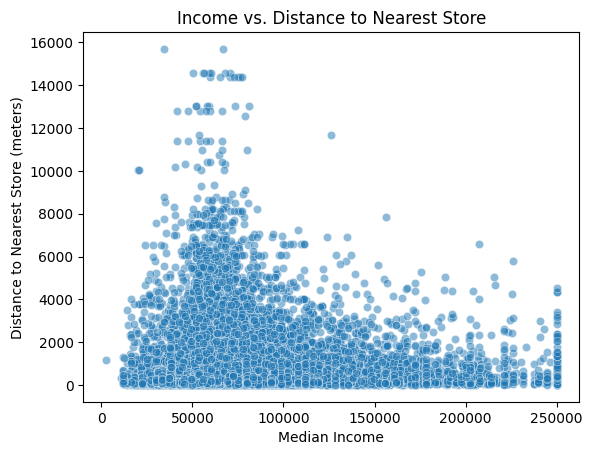

In [18]:
# Load the merged dataframe
df = pd.read_csv('merged_census_store_data.csv')

# 1. Scatter plot: Income vs. Distance to Nearest Store
sns.scatterplot(x='median_income', y='distance_to_nearest_store', data=df, alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Distance to Nearest Store (meters)')
plt.title('Income vs. Distance to Nearest Store')
plt.show()

## Plot 2: Residual Plot 
The residual plot shows the data is not in a linear format. It was hard to tell exactly how to change the data in the data based on the residuals, but we eventually decided that a log-linear model was best due to the y values increasing faster than the x values. 

<Axes: xlabel='median_income', ylabel='distance_to_nearest_store'>

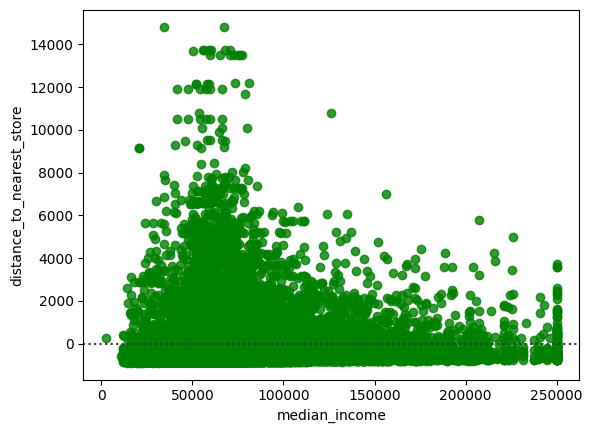

In [19]:
sns.residplot(x='median_income', y='distance_to_nearest_store', data=df, color='green')

## Plot 3: Linear Regression Log-Linear 
The slope of the log-linear linear regression is 0 which suggests that there is no relationship between income and distance to grocery store. This answers the first question and shows that there is no relationship between income and distance to grocery stores.  

In [20]:
# Extract the independent variable (X) and dependent variable (y)
X = df['median_income'].values.reshape(-1, 1)  # Reshape for  compatibility
y = df['distance_to_nearest_store'].values

# Apply log transformation to the dependent variable (y) to make it log-linear
log_y = np.log(y)

# Create and fit the log-linear regression model
visitor_model = LinearRegression().fit(X, log_y)

# Get the slope (coefficient) and intercept of the log-linear regression model
slope = visitor_model.coef_[0]  
intercept = visitor_model.intercept_

# Print the slope and intercept of the model
print(f"The model's slope is: {np.round(slope, 2)}")
print(f"The model's intercept is: {np.round(intercept, 2)}")

The model's slope is: 0.0
The model's intercept is: 5.67


## Plot 4: Distance to Nearest Store by Income Bracket
After seeing no correlation using a scatter plot, we tried to split the data up by income bracket to see if any other conclusions could be drawn. In this plot very low income people have the shortest distance to grocery stores. This is likely do to many very low income people living in more urban areas. Every other income group has relatively similar values for distance to weather stations. High income has a slightly lower value and very high income a slightly larger value. Very high income people most likely have a slightly larger distance to grocery stores as they are more likely to live in suburban areas. 

Additionally, we noticed that there are more outliers for the lower income groups, which led us to try looking at the standard deviation and various of each income bracket next.

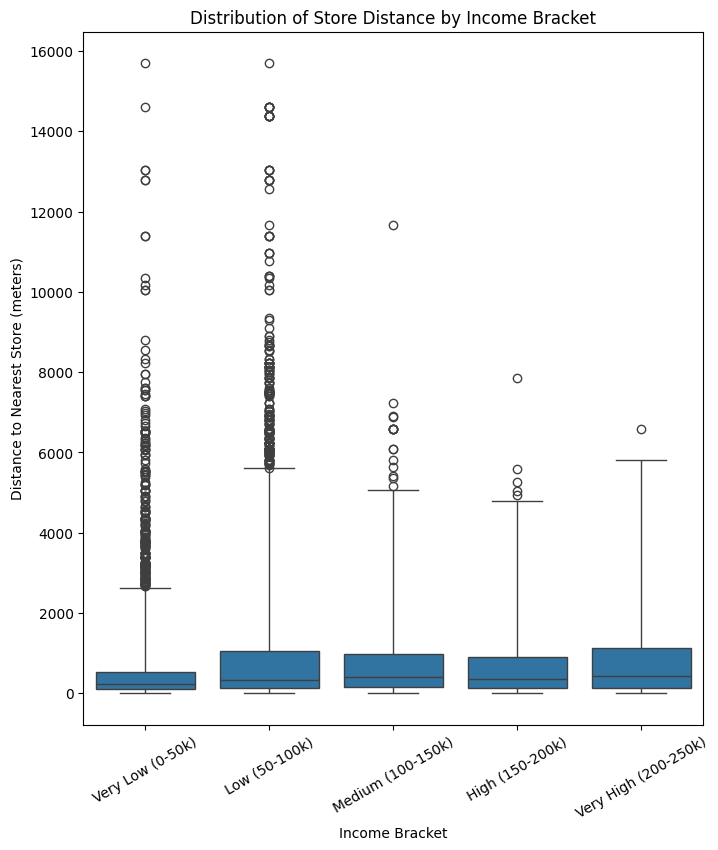

In [21]:
# 2. Box plot: Distance to Nearest Store by Income Bracket

df['log_distance'] = np.log1p(df['distance_to_nearest_store'])

df['income_bracket'] = pd.cut(df['median_income'], bins=5, labels=['Very Low (0-50k)', 'Low (50-100k)', \
    'Medium (100-150k)', 'High (150-200k)', 'Very High (200-250k)'])


plt.figure(figsize=[8, 9])
sns.boxplot(x='income_bracket', y='distance_to_nearest_store', data=df, whis=5)  # Increase whisker length
plt.xlabel('Income Bracket')
plt.ylabel('Distance to Nearest Store (meters)')
plt.title('Distribution of Store Distance by Income Bracket')
plt.xticks(rotation=30)
plt.show()

## Standard Deviation and Variances Across Different Income Brackets
We noted that very low income and low income brackets have the highest outliers so we decided to analyze for SD and Variance to see the extent of differences and to verify whether the observed is simply visual or actually statistic. Our 

In [22]:
list = ['Very Low (0-50k)', 'Low (50-100k)', \
    'Medium (100-150k)', 'High (150-200k)', 'Very High (200-250k)']
for i in list:
    corr = np.std(df['income_bracket'] == i)
    var = np.var(df['income_bracket'] == i)
    print("Correlation of " + i + ": "+ str(corr))
    print("Variance of " + i + ": "+str(var))

Correlation of Very Low (0-50k): 0.4285109215701942
Variance of Very Low (0-50k): 0.18362160990493714
Correlation of Low (50-100k): 0.49849124435212333
Variance of Low (50-100k): 0.24849352069572833
Correlation of Medium (100-150k): 0.35760667153432873
Variance of Medium (100-150k): 0.12788253152586126
Correlation of High (150-200k): 0.21149760349878646
Variance of High (150-200k): 0.04473123628572989
Correlation of Very High (200-250k): 0.1445339697830616
Variance of Very High (200-250k): 0.020890068421250962


### Summary Analysis of Correlation and Variance Across Income Brackets
Very Low Income (0–50k):
- A moderate correlation of 0.4285 indicates income somewhat predicts behavior, but not strongly.
- With a variance of 0.1836, this group shows high variability, consistent with observed outliers.

Low Income (50–100k):
- A correlation of 0.4985 suggests a relatively strong positive relationship between income and behavior.
- The variance is 0.2485, the highest among all groups, indicating significant diversity within this bracket.

Medium Income (100–150k):
- The correlation drops to 0.3576, indicating a weaker relationship between income and behavior.
- With a variance of 0.1279, behavior within this group is more consistent compared to lower income brackets.

High Income (150–200k):
- A correlation of 0.2115 shows that income has little predictive power in this range.
- The variance is 0.0447, suggesting tightly clustered and more uniform behavior.

Very High Income (200–250k):
- The correlation of 0.1445 is very weak, meaning income has minimal influence on behavior.
- The variance of 0.0209 is the lowest, reflecting consistent and predictable behavior at this income level

Key Insights
- Lower income groups exhibit high variance and strong correlations, suggesting income plays a larger role in driving behavior.
- Higher income groups show more uniform behavior with weaker correlations, indicating that factors beyond income become more important.
- Outliers in lower income groups reflect economic disparity, suggesting targeted policy interventions could be more effective for these groups.

## Final Check: Pearson's Correlation Analysis
We also did a normal Pearson's correlation analysis since both variables are quantitative and the relationship seemed mostly normal. Since the p-value > 0.05, this indicates that there is **no statistically significant linear relationship** between Income and Distance to grocery stores. It suggests that the small correlation observed could very likely be due to random chance. Additionally, the correlation is slightly negative yet very close to 0, making it not significant. The slight negative value suggests that, if any relationship exists, higher incomes might correlate with slightly shorter distances, but the effect is negligible.

In [23]:
corr, p_value = pearsonr(df['median_income'], df['distance_to_nearest_store'])

print("The correlation is " + str(corr)+".")
print("The p-value is " + str(p_value)+".")

The correlation is -0.01356604948323156.
The p-value is 0.0956866359776694.


## Question 1 Summary

There appears to be no significant relationship between income and distance to grocery store. The data does not follow any particular identifiable relationship. However, there is greater variance in lower income groups suggesting income drives behavior more with low income households.

## Question 2 Analysis: Relationship between Distance to Grocery Store & Racial Category
We then looked to see if there is a correlation between average distance to grocery stores and racial category.

## Plot 5: Average Distance to Nearest Store by Racial Majority
The average distance to weather stations is highest among white people. This again is likely do to more white people living in suburban areas. The values are more equal for other racial groups where the distance is around 400 meters for all of them. The lowest average distance is for Black people. This might be due to the higher population of Black people in New York City where everyone has a shorter distance to grocery stores.

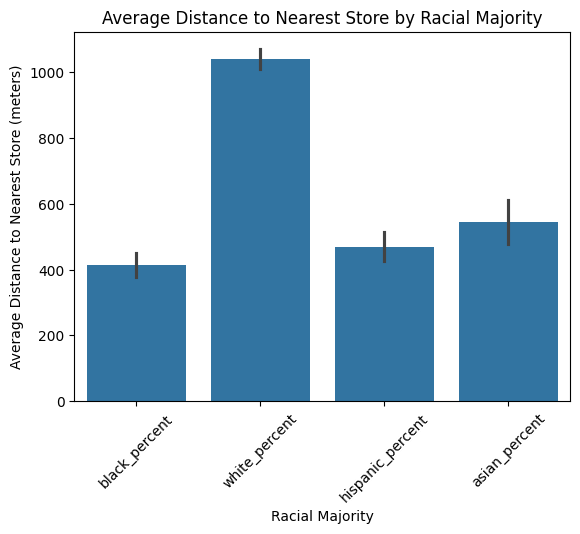

In [24]:
# 3. Bar plot: Average Distance to Nearest Store by Racial Majority
df['racial_majority'] = df[['white_percent', 'black_percent', 'asian_percent', 'hispanic_percent']].idxmax(axis=1)
sns.barplot(x='racial_majority', y='distance_to_nearest_store', data=df, estimator=lambda x: x.mean())
plt.xlabel('Racial Majority')
plt.ylabel('Average Distance to Nearest Store (meters)')
plt.title('Average Distance to Nearest Store by Racial Majority')
plt.xticks(rotation=45)
plt.show()

## Analysis of Pearson Correlation for Different Racial Groups and Distance to Nearest Store 
These results could suggest racial disparities in grocery store access, and verify if there is any statistically significant relationship between the variables.

In [25]:
corr, p_value = pearsonr(df['black_percent'], df['distance_to_nearest_store'])

print("For Black Group:")
print("The correlation is " + str(corr)+".")
print("The p-value is " + str(p_value)+".")

corr, p_value = pearsonr(df['white_percent'], df['distance_to_nearest_store'])

print("For White Group:")
print("The correlation is " + str(corr)+".")
print("The p-value is " + str(p_value)+".")

corr, p_value = pearsonr(df['hispanic_percent'], df['distance_to_nearest_store'])

print("For Hispanic Group:")
print("The correlation is " + str(corr)+".")
print("The p-value is " + str(p_value)+".")

corr, p_value = pearsonr(df['asian_percent'], df['distance_to_nearest_store'])

print("For Asian Group:")
print("The correlation is " + str(corr)+".")
print("The p-value is " + str(p_value)+".")

For Black Group:
The correlation is -0.16134165612441248.
The p-value is 1.6465081492495748e-88.
For White Group:
The correlation is 0.2650780662653263.
The p-value is 5.818726637775586e-241.
For Hispanic Group:
The correlation is -0.19243571092469608.
The p-value is 8.672754753738992e-126.
For Asian Group:
The correlation is -0.12032262649433789.
The p-value is 9.258270849575635e-50.


## Analysis
#### Black Group:
**Correlation**: 0.2651 (positive)

**P-value**: 5.82e-241 (extremely small)

**Interpretation**: There is a weak to moderate positive correlation between the percentage of Black residents in a census tract and the distance to the nearest grocery store. As the percentage of Black residents increases, the distance to the nearest store tends to increase slightly. This correlation is highly statistically significant due to the extremely low p-value.

#### White Group:
**Correlation**: -0.1613 (negative)

**P-value**: 1.65e-88 (extremely small)

**Interpretation**: There is a weak negative correlation between the percentage of White residents and distance to the nearest store. As the percentage of White residents increases, the distance to the nearest store tends to decrease slightly. This correlation is also highly statistically significant.

#### Hispanic Group:
**Correlation**: -0.1924 (negative)

**P-value**: 8.67e-126 (extremely small)

**Interpretation**: There is a weak negative correlation between the percentage of Hispanic residents and distance to the nearest store. As the percentage of Hispanic residents increases, the distance to the nearest store tends to decrease slightly. This correlation is highly statistically significant.

#### Asian Group:
**Correlation**: -0.1203 (negative)

**P-value**: 9.26e-50 (extremely small)

**Interpretation**: There is a weak negative correlation between the percentage of Asian residents and distance to the nearest store. As the percentage of Asian residents increases, the distance to the nearest store tends to decrease slightly. This correlation is highly statistically significant.

#### Overall significance:
All correlations are **statistically significant** due to extremely **low p-values** (much smaller than the typical 0.05 threshold).
- The White group shows a positive correlation, while all other groups show negative correlations.
- The White group has the strongest correlation (albeit still weak to moderate), followed by the Hispanic group.

These results suggest racial disparities in grocery store access, with predominantly White neighborhoods tending to have slightly worse access (longer distances) compared to other racial groups.

While these correlations are statistically significant, they are relatively weak, indicating that racial composition alone doesn't explain a large portion of the variation in store distance. Other factors (like urban/rural classification, income levels, etc.) likely play important roles as well.

## Correlation & Covariance Matrices Of Multiple Variables

### Correlation

The correlation matrix reveals several key patterns. Census tracts with higher **median incomes** have a **positive correlation** with the percentage of white residents (r = 0.29) and **negative correlations** with Black (r = -0.28) and Hispanic populations (r = -0.24). This indicates that wealthier areas tend to have more white residents and fewer Black or Hispanic residents. Additionally, white and Black populations have a **strong negative correlation** (r = -0.71), and white and Hispanic populations are also negatively correlated (r = -0.68), reflecting patterns of racial segregation.

When it comes to store access, there is a **positive correlation** with Black (r = 0.21) and Hispanic populations (r = 0.21), meaning areas with higher proportions of these groups have better access to grocery stores within 500 meters. In contrast, there is a **negative correlation** between store access and white population (r = -0.31), indicating that predominantly white areas are less likely to have nearby stores. 

The relationship between **distance to the nearest store** and store access is **strongly negative** (r = -0.59), as expected—closer distances make store access more likely. Interestingly, predominantly white areas tend to have stores farther away, as shown by the **positive correlation** between white population and store distance (r = 0.27). On the other hand, **median income** shows minimal correlation with both store distance (r = -0.01) and store access (r = -0.09), suggesting that **race** plays a more significant role than income in determining access to grocery stores.

In [26]:
#Create new dataframe of key variables to be examined

df['store_access'] = (df['distance_to_nearest_store'] < 500).astype(int)

key_variables = ['median_income', 'white_percent', 'black_percent', 
                  'hispanic_percent', 'asian_percent', 
                  'distance_to_nearest_store', 'store_access']
filtered_df = df[key_variables]

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                           median_income  white_percent  black_percent  \
median_income                   1.000000       0.291763      -0.281050   
white_percent                   0.291763       1.000000      -0.705070   
black_percent                  -0.281050      -0.705070       1.000000   
hispanic_percent               -0.241770      -0.684678       0.152227   
asian_percent                   0.080382      -0.349492      -0.141922   
distance_to_nearest_store      -0.013566       0.265078      -0.161342   
store_access                   -0.090620      -0.310487       0.212385   

                           hispanic_percent  asian_percent  \
median_income                     -0.241770       0.080382   
white_percent                     -0.684678      -0.349492   
black_percent                      0.152227      -0.141922   
hispanic_percent                   1.000000       0.068537   
asian_percent                      0.068537       1.000000   
distance_to_nearest_store         -

### Covariance

The covariance matrix shows how two variables change together. Positive values mean the variables tend to increase together, while negative values indicate that as one variable increases, the other decreases. The magnitude reflects the variability between them.

Median income has a **positive covariance** with the white population (3.79 * 10^5) and negative covariance with the Black (-2.48 * 10^5) and Hispanic populations (-1.74 * 10^5). This suggests wealthier areas have more white residents and fewer Black and Hispanic residents.

Predominantly white areas tend to have stores farther away, as shown by the positive covariance between white percentage and distance (1.19 * 10^4).

The covariance between white and Black populations is **negative** (-4.59 * 10^2), indicating that these groups tend not to be concentrated in the same areas. This matrix provides insight into the joint variability between income, race, and store access.

In [27]:
#Create covariance matrix
cov_matrix = df[key_variables].cov()

# Print the covariance matrix
print(cov_matrix)

                           median_income  white_percent  black_percent  \
median_income               1.760361e+09  379487.506315 -248107.133948   
white_percent               3.794875e+05     961.021281    -459.889634   
black_percent              -2.481071e+05    -459.889634     442.699750   
hispanic_percent           -1.740251e+05    -364.134562      54.948264   
asian_percent               4.264476e+04    -136.997086     -37.758380   
distance_to_nearest_store  -8.302754e+05   11986.937184   -4951.868260   
store_access               -1.842108e+03      -4.663390       2.165065   

                           hispanic_percent  asian_percent  \
median_income                -174025.134190   42644.761824   
white_percent                   -364.134562    -136.997086   
black_percent                     54.948264     -37.758380   
hispanic_percent                 294.318622      14.867676   
asian_percent                     14.867676     159.887790   
distance_to_nearest_store      -481

## Question 2 Summary

There appears to be some significant relationship between racial category and distance to grocery store. Specifically, predominantly white tracts have higher distance to grocery stores, wheras a higher percentage of all other racial categories correlate to lower distance to grocery stores.

Our data implies that it's possible grocery store access in areas with a higher percentage of white people is gated by the ownership of a car or other means of transportation, due to the distance. When looking at equitable housing, grocery store access in a community is no doubt an important factor to consider. 

## Idea for Future: Potential Multivariable Analysis
Accuracy shows the percentage of correct predictions. Confusion Matrix gives more detailed insight into true positives, false positives, etc. Regression Coefficient shows how a change in income affects the odds of having a grocery store within X mile radius.

In [28]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split

# # Prepare the features and target
# X = df['median_income']  # Independent variable: median income
# df['store_access'] = (df['distance_to_nearest_store'] < 500).astype(int)
# y = df["store_access"]  # Dependent variable: binary store access

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train the logistic regression model
# log_model = LogisticRegression()
# log_model.fit(X_train, y_train)

# # Make predictions
# y_pred = log_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{class_report}')

# # Display the logistic regression coefficient
# print(f'Logistic Regression Coefficient: {log_model.coef_[0][0]}')

## Questions for reviewers

1. How do we calculate density of grocery stores for individual tracts? Since tracts are irregularly shaped, we are not certain how to search for grocery stores within it. Initial idea was 1 mile radius. Then we thought about getting data for entire area of tract, assume the area is circular, to find radius (r) and then using that radius to search (using latitude and longitude) for grocery stores in that circular area?

2. Given the limitations of our data and analysis methods, what additional data sources or techniques would you recommend to strengthen our findings? For example, would incorporating public transportation data or health outcome statistics be feasible and valuable?

3. How can we better visualize or quantify the potential disparities in food access among different racial groups based on our current data? Are there any specific visualization techniques or metrics you would suggest?

4. What potential confounding factors should we consider when interpreting the relationship between income levels and store counts? How might we control for these in our analysis?

5. Given that our data is a snapshot in time, how would you suggest we frame our conclusions to account for this limitation? Are there ways we could hint at potential trends even without time-series data?



## References

Geopandas intro tutorial:
https://geopandas.org/en/stable/getting_started/introduction.html

Spacial data links: 
https://walker-data.com/posts/proximity-analysis/
https://michaelminn.net/tutorials/python-proximity/index.html

Geopandas, for geospatial operations in Python, guide to getting started:
https://geopandas.org/en/stable/getting_started/introduction.html
https://geopandas.org/en/stable/docs/user_guide.html

Shapely for geometric operations:
https://shapely.readthedocs.io/en/stable/manual.html 

Conducting Geospatial Analysis in GeoPandas:
https://geog-312.gishub.org/book/geospatial/geopandas.html 

Figuring out pd.DF.apply: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

Using Lambda function to PD Dataframes:
https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

Coordinate Reference Systems Info:
https://docs.qgis.org/latest/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

Geopandas and Shapeley guide:
https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/ 

API Sources: 
https://pygis.io/docs/d_access_census.html
https://n8henrie.com/uploads/2017/11/plotting-us-census-data-with-python-and-geopandas.html
